In [52]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
df=pd.read_csv('soft2.csv');
from scipy.special import boxcox, inv_boxcox

df.head(10)

,Time,Fault
0,0,0
1,1,1
2,2,0
3,3,0
4,4,1
5,5,1
6,6,1
7,7,0
8,8,0
9,9,0


In [53]:
length=len(df['Fault'])
sum=0;
for i in range(1,length):
    sum= sum+df['Fault'][i]
    df['Fault'][i]=sum
    #print(sum)

df.head(10)

,Time,Fault
0,0,0
1,1,1
2,2,1
3,3,1
4,4,2
5,5,3
6,6,4
7,7,4
8,8,4
9,9,4


In [54]:
##Data Transformation when Lemda=zero
df['Fault1']=df['Fault']
df.Fault1=df.Fault1.astype(float)
df.head(10)
    

,Time,Fault,Fault1
0,0,0,0.0
1,1,1,1.0
2,2,1,1.0
3,3,1,1.0
4,4,2,2.0
5,5,3,3.0
6,6,4,4.0
7,7,4,4.0
8,8,4,4.0
9,9,4,4.0


In [55]:
length= len(df['Fault1'])
lemda = 0
for i in range(1,length):
    df['Fault1'][i] = math.log(df['Fault1'][i] , 2)
    
df.head(10)

<ipython-input-55-0056ddba1eb9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault1'][i] = math.log(df['Fault1'][i] , 2)


,Time,Fault,Fault1
0,0,0,0.000000
1,1,1,0.000000
2,2,1,0.000000
3,3,1,0.000000
4,4,2,1.000000
5,5,3,1.584963
6,6,4,2.000000
7,7,4,2.000000
8,8,4,2.000000
9,9,4,2.000000


In [56]:
class LinarRegression:
    def __init__ (self,TempDataInput, TempDataFaults):
        self.TempDataInput=TempDataInput
        self.TempDataFaults=TempDataFaults
        self.predictResult=[]
        self.nextresult=[]

        
    def calculation(self):
        self.mean_x=np.mean(self.TempDataInput)
        self.mean_y=np.mean(self.TempDataFaults)
        print("MeanX and MeanY",self.mean_x,self.mean_y)
        
        self.numer=0.0
        self.dnum=0.0
        
        for i in range(len(self.TempDataInput)):
            self.numer+=(self.TempDataInput[i]-self.mean_x)*(self.TempDataFaults[i]-self.mean_y)
            self.dnum+=(self.TempDataInput[i]-self.mean_x)*(self.TempDataInput[i]-self.mean_x)
            
        self.cof_= self.numer/self.dnum
        self.intercept_=self.mean_y -(self.mean_x*self.cof_)
        
        print(f"Coefficiant {self.cof_}  and intercept {self.intercept_}")
        
        for i in self.TempDataInput:
            self.predictResult.append((i*self.cof_ +self.intercept_))
    
    def predict(self,val):
        return val*self.cof_+self.intercept_
            
            
    def DrawGraph(self):
        plt.xlabel='Year'
        plt.ylabel='Fault'
        #plt.scatter(df.Year,df.percent,color='RED', marker='+')
        plt.plot(self.TempDataInput,self.TempDataFaults,color='blue',marker='+')
        plt.plot(self.TempDataInput,self.predictResult,color='RED',marker='+')
        
    def NextPrediction(self, start, end, dist):
        ##PredictNext5data Analysis
        self.totalError=0.0;
        for i in range(start,end):
            self.temp= (i*self.cof_ +self.intercept_)
            self.nextresult.append(self.temp);
            
        #self.revers = inv_boxcox(self.nextresult , lemda)
        
        for i in range(len(self.nextresult)):
            self.nextresult[i]=2**self.nextresult[i];
        
        
        for i in range(start,end):
            self.totalError+=abs(self.nextresult[i-start]-df['Fault'][i])
            print(i," act=",df['Fault'][i], "predict",self.nextresult[i-start],"RE", (abs((self.nextresult[i-start]-df['Fault'][i])))/(df['Fault'][i]))
        print("** The average Value ",self.totalError/dist )
        
        plt.xlabel='Year'
        plt.ylabel='Fault'
        #plt.scatter(df.Year,df.percent,color='RED', marker='+')
        
        
        templist=[]
        templist2=[]
        for i in range(start,end):
            templist.append(i);
            templist2.append(df['Fault'][i])
        #plt.plot(templist,templist2,color='blue',marker='+')
        #plt.plot(templist, self.revers,color='RED',marker='+')
            
                                                       
    


MeanX and MeanY 5.5 1.2584962500721155
Coefficiant 0.27524265151078087  and intercept -0.25533833323717925
11  act= 5 predict 6.832108248783528 RE 0.36642164975670555
12  act= 8 predict 8.268201136286246 RE 0.03352514203578072
13  act= 8 predict 10.006157329585253 RE 0.25076966619815666
14  act= 12 predict 12.109427776860317 RE 0.00911898140502639
15  act= 12 predict 14.654800664529846 RE 0.22123338871082052
** The average Value  1.374139031209038


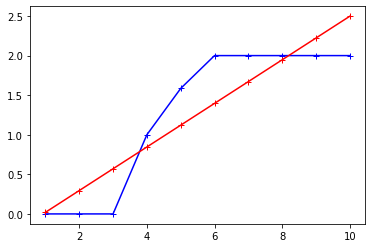

In [57]:
#################################### 10X5 ##############################
First_TenDataInput=[];
First_TenDataFults=[];
for i in range(1,11):
    First_TenDataInput.append(i)
    First_TenDataFults.append(df['Fault1'][i])

l1=LinarRegression(First_TenDataInput,First_TenDataFults);    
l1.calculation()
l1.DrawGraph()
l1.NextPrediction(11,16,5)
del l1

MeanX and MeanY 10.5 2.343393835588389
Coefficiant 0.21582272623200877  and intercept 0.07725521015229697
21  act= 15 predict 24.41223470728535 RE 0.6274823138190233
22  act= 16 predict 28.3515398174461 RE 0.7719712385903812
23  act= 16 predict 32.92651490772167 RE 1.0579071817326042
24  act= 16 predict 38.23973551169461 RE 1.3899834694809132
25  act= 16 predict 44.410329368366774 RE 1.7756455855229234
26  act= 18 predict 51.5766473856403 RE 1.8653692992022388
27  act= 18 predict 59.89936560654032 RE 2.3277425336966844
28  act= 20 predict 69.56508772737561 RE 2.4782543863687807
29  act= 20 predict 80.79052893991033 RE 3.0395264469955166
30  act= 22 predict 93.82737490348767 RE 3.2648806774312575
** The average Value  34.69993588754687


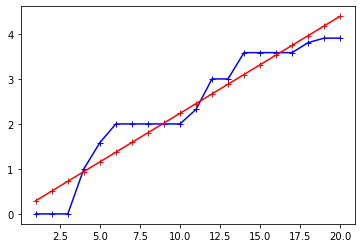

In [58]:
#################################### 20X10 ##############################
First_20DataInput=[];
First_20DataFults=[];
for i in range(1,21):
    First_20DataInput.append(i)
    First_20DataFults.append(df['Fault1'][i])

l2=LinarRegression(First_20DataInput,First_20DataFults);    
l2.calculation()
l2.DrawGraph()
l2.NextPrediction(21,31,10)
del l2

MeanX and MeanY 15.5 2.9405968372890987
Coefficiant 0.14569115311694633  and intercept 0.6823839639764304
31  act= 23 predict 36.72803254926267 RE 0.5968709804027249
32  act= 23 predict 40.630771781785285 RE 0.7665552948602298
33  act= 23 predict 44.94821805032028 RE 0.9542703500139251
34  act= 24 predict 49.72443833333377 RE 1.0718515972222404
35  act= 27 predict 55.00818218861274 RE 1.0373400810597313
36  act= 30 predict 60.853379326501916 RE 1.0284459775500638
37  act= 30 predict 67.31969005552263 RE 1.243989668517421
38  act= 33 predict 74.47311421862076 RE 1.2567610369279019
39  act= 33 predict 82.38666483528682 RE 1.4965656010692976
40  act= 37 predict 91.14111332522707 RE 1.4632733331142451
** The average Value  32.0213604664474


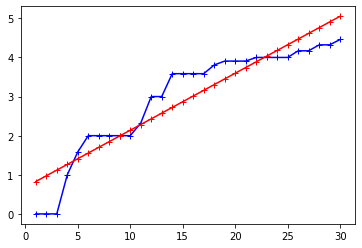

In [59]:
#################################### 30X10 ##############################
First_30DataInput=[];
First_30DataFults=[];
for i in range(1,31):
    First_30DataInput.append(i)
    First_30DataFults.append(df['Fault1'][i])

l3=LinarRegression(First_30DataInput,First_30DataFults);    
l3.calculation()
l3.DrawGraph()
l3.NextPrediction(31,41,10)
del l3

MeanX and MeanY 20.5 3.406011594632288
Coefficiant 0.1150957071384965  and intercept 1.04654959829311
41  act= 38 predict 54.39769404989083 RE 0.4315182644708113
42  act= 45 predict 58.91525344739566 RE 0.3092278543865703
43  act= 46 predict 63.80798211018712 RE 0.38713004587363303
44  act= 46 predict 69.10703667954665 RE 0.5023268843379707
45  act= 46 predict 74.8461612589648 RE 0.6270904621514086
46  act= 46 predict 81.06190229483462 RE 0.7622152672790136
47  act= 46 predict 87.79384130231882 RE 0.9085617674417136
48  act= 47 predict 95.08484691837644 RE 1.0230818493271583
49  act= 47 predict 102.98134788701046 RE 1.1910925082342652
50  act= 47 predict 111.53362871509111 RE 1.3730559301083216
51  act= 47 predict 120.79614988147658 RE 1.5701308485420549
52  act= 47 predict 130.82789463850568 RE 1.7835722263511848
53  act= 47 predict 141.69274461427668 RE 2.01473924711227
54  act= 48 predict 153.45988660752752 RE 2.197080970990157
55  act= 49 predict 166.20425316556643 RE 2.39192353399

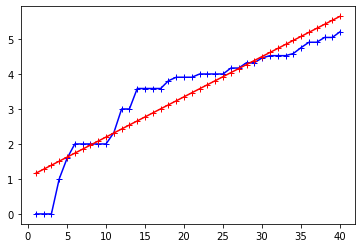

In [60]:
#################################### 40X15 ##############################
First_40DataInput=[];
First_40DataFults=[];
for i in range(1,41):
    First_40DataInput.append(i)
    First_40DataFults.append(df['Fault1'][i])

l4=LinarRegression(First_40DataInput,First_40DataFults);    
l4.calculation()
l4.DrawGraph()
l4.NextPrediction(41,56,15)
del l4